In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_excel(r"C:\Users\Lily Ewing\Downloads\Arizona_historic_ExportTable_TableToExcel.xlsx")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104956 entries, 0 to 104955
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   OBJECTID                       104956 non-null  int64  
 1   FOD_ID                         104956 non-null  int64  
 2   FPA_ID                         104956 non-null  object 
 3   SOURCE_SYSTEM_TYPE             104956 non-null  object 
 4   SOURCE_SYSTEM                  104956 non-null  object 
 5   NWCG_REPORTING_AGENCY          104956 non-null  object 
 6   NWCG_REPORTING_UNIT_ID         104956 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME       104956 non-null  object 
 8   SOURCE_REPORTING_UNIT          104956 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME     104956 non-null  object 
 10  LOCAL_FIRE_REPORT_ID           59023 non-null   float64
 11  LOCAL_INCIDENT_ID              48825 non-null   object 
 12  FIRE_CODE                     

Number of Fires by Year

In [62]:
test = df.groupby('FIRE_YEAR')['FIRE_YEAR'].count()

print(test)

x = test.index
y = test.values

FIRE_YEAR
1992    3494
1993    4636
1994    4519
1995    4501
1996    3761
1997    2250
1998    2679
1999    2736
2000    3859
2001    3186
2002    2917
2003    2915
2004    2906
2005    3689
2006    3315
2007    2442
2008    1898
2009    2452
2010    3061
2011    3559
2012    3206
2013    3083
2014    2827
2015    3819
2016    1787
2017    4181
2018    9738
2019    5810
2020    5730
Name: FIRE_YEAR, dtype: int64


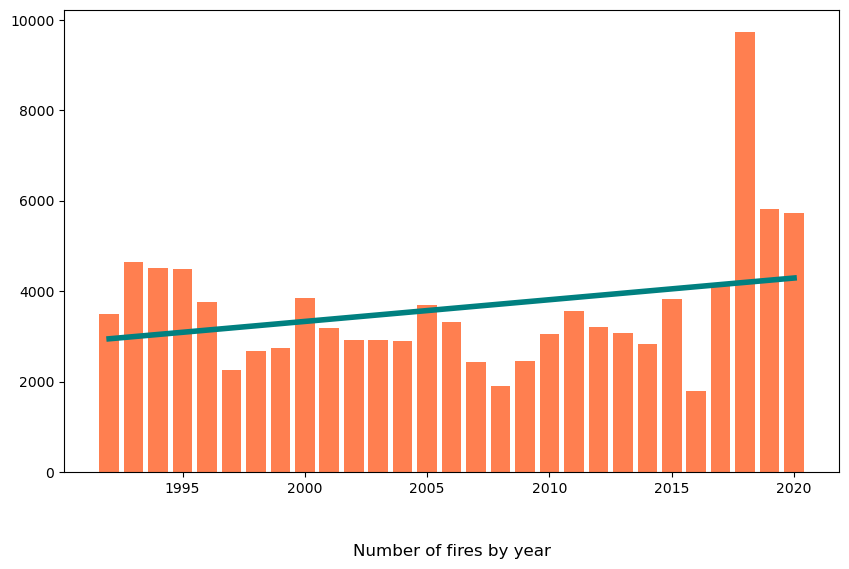

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y, color='coral')
plt.title('Number of fires by year', y=-0.2)
fit1 = np.polyfit(x, y, deg=1)
ax.plot(x, x*fit1[0] + fit1[1], color='teal', linewidth=4);

Observations
    2018 had the most number of fires than any other year while 2016 had the least number of fires. 

Cause of Fire

In [64]:
distribution = df['NWCG_GENERAL_CAUSE'].value_counts()

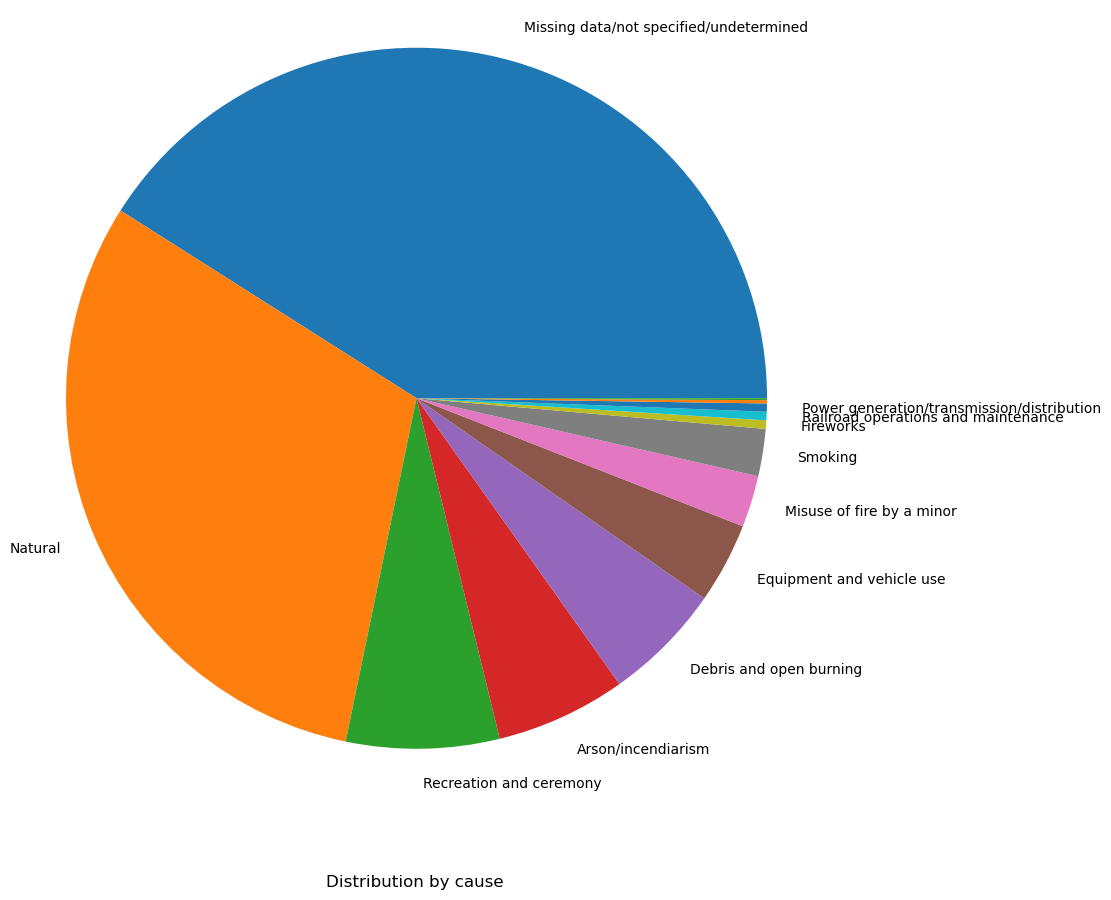

In [65]:
plt.figure(figsize=(10,10))
plt.title('Distribution by cause', y=-0.15)
plt.pie(distribution, labels=list(distribution.index[:-2]) + ['', '']);
plt.axis('equal');

Observations
    The causes that are not specified or are unknown or missing greatly outweigh any other category, which is not ideal. According to this data, of the fires that have a documented cause, natural is most prevalent. Power generation/transmission/distribution are the least prevalent. 

In [66]:
distribution2 = df['FIRE_SIZE'].value_counts()

In [67]:
test = df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

print(test)

x = test.index
y = test.values

FIRE_YEAR
1992     12.190512
1993     44.341322
1994     49.612688
1995     58.243186
1996     49.827324
1997      5.936400
1998     10.219784
1999     26.973319
2000     24.076263
2001     11.241915
2002    215.885958
2003     68.614312
2004     79.059818
2005    244.740333
2006     54.751548
2007     47.168030
2008     60.018641
2009     90.572904
2010     28.683502
2011    291.679638
2012     71.435440
2013     33.541651
2014     71.869354
2015     40.799756
2016    170.853788
2017    104.733031
2018     17.136474
2019     64.296716
2020    169.494355
Name: FIRE_SIZE, dtype: float64


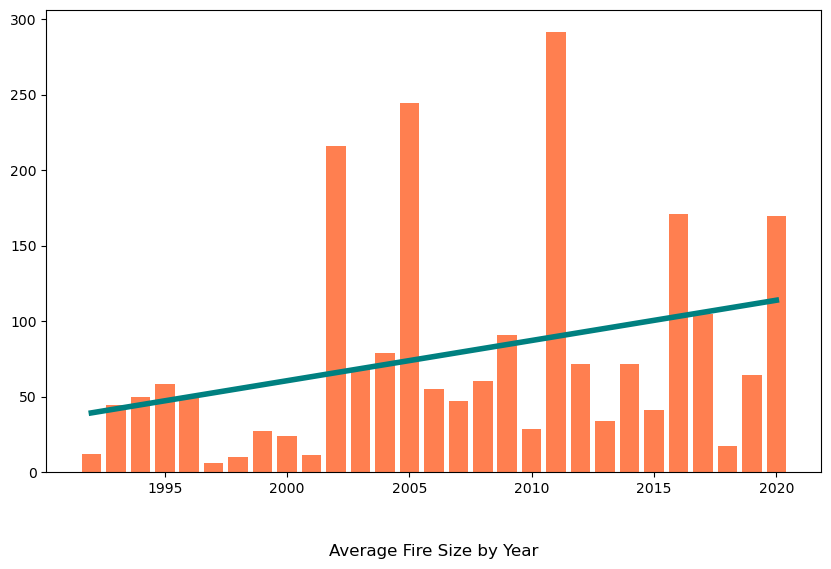

In [68]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, y, color='coral')
plt.title('Average Fire Size by Year', y=-0.2)
fit1 = np.polyfit(x, y, deg=1)
ax.plot(x, x*fit1[0] + fit1[1], color='teal', linewidth=4);

Observations
    2018 has the highest average fire size and 1997 has the smallest average fire size. 2018 could've been largest because it also has the most fires by far than any other year. 

In [69]:
month= pd.DatetimeIndex(df["DISCOVERY_DATE"]).month
print(month)

Int64Index([ 5,  5,  6,  7,  5,  5,  6,  7,  6,  7,
            ...
            11,  9,  5,  1,  7, 12,  8,  8,  7,  7],
           dtype='int64', name='DISCOVERY_DATE', length=104956)


In [70]:
month= pd.DatetimeIndex(df["DISCOVERY_DATE"]).month
month_abbreviations= []
for value in month:
    if value ==1:
        month_abbreviations.append("January")
    elif value == 2:
        month_abbreviations.append("February")
    elif value == 3:
        month_abbreviations.append("March")
    elif value == 4:
        month_abbreviations.append("April")
    elif value == 5:
        month_abbreviations.append("May")
    elif value == 6:
        month_abbreviations.append("June")
    elif value == 7:
        month_abbreviations.append("July")
    elif value == 8:
        month_abbreviations.append("August")
    elif value == 9:
        month_abbreviations.append("September")
    elif value == 10:
        month_abbreviations.append("October")
    elif value == 11:
        month_abbreviations.append("November")
    elif value == 12:
        month_abbreviations.append("December")
                                   
df['MONTH']= month_abbreviations
df['MONTH_INDICATOR']= month
df[['DISCOVERY_DATE','MONTH_INDICATOR','MONTH']]

,DISCOVERY_DATE,MONTH_INDICATOR,MONTH
0,5/16/2005,5,May
1,5/18/2005,5,May
2,6/26/2005,6,June
3,7/14/2005,7,July
4,5/27/2005,5,May
...,...,...,...
104951,12/16/2020,12,December
104952,8/21/2019,8,August
104953,8/22/2019,8,August
104954,7/7/2019,7,July


In [71]:
test= df.groupby(['MONTH_INDICATOR','MONTH'])['MONTH'].count()
test= test.droplevel(0)
print(test)
print(df.groupby(['MONTH'])['MONTH'].count())


MONTH
January       3387
February      3194
March         4661
April         7885
May          14884
June         18679
July         22831
August       13382
September     6119
October       4352
November      3252
December      2330
Name: MONTH, dtype: int64
MONTH
April         7885
August       13382
December      2330
February      3194
January       3387
July         22831
June         18679
March         4661
May          14884
November      3252
October       4352
September     6119
Name: MONTH, dtype: int64


Text(0.5, -0.2, 'Fires by Month')

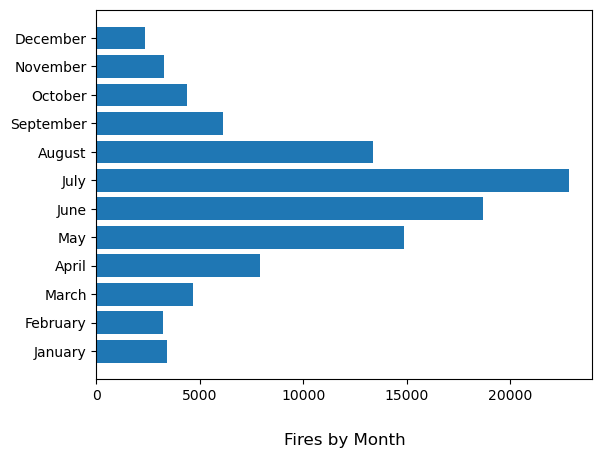

In [72]:
fig= plt.figure()
ax=plt.subplot(1,1,1)
ax.barh(test.index,test.values)
plt.title('Fires by Month', y=-0.2)

Observations
    Arizona has the largest number of fires in July with the surrounding summer months of Augus, June, May higher than the rest of the year.